In [1]:
!pip install biopython

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Images/Leo_data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Lectura de datos

import numpy as np
from Bio import SeqIO
from sklearn.model_selection import train_test_split

def read_fasta_data(fasta_file):
    result = []
    seq_ids = []
    fp = open(fasta_file, 'r')
    for seq_record in SeqIO.parse(fp, 'fasta'):
        seq = seq_record.seq
        seq_id = seq_record.id
        result.append(str(seq))
        seq_ids.append(seq_id)
    fp.close()
    return result, seq_ids

FILE_TFS = data_path + 'TFS.fasta'
FILE_NOTFS = data_path + 'NoTfs.fasta'

seq_tfs, seq_tfs_ids = read_fasta_data(FILE_TFS)
seq_notfs, seq_notfs_ids = read_fasta_data(FILE_NOTFS)

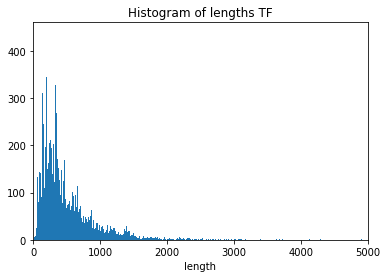

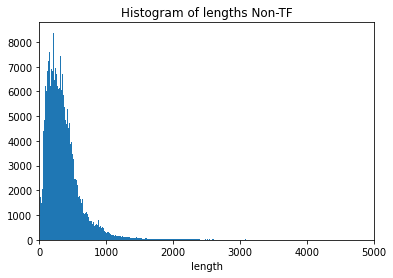

In [5]:
# Generación de histogramas

import matplotlib.pyplot as plt

lengths_tfs = [len(t) for t in seq_tfs]
plt.hist(lengths_tfs , bins = len(set(lengths_tfs)))
plt.title('Histogram of lengths TF')
plt.xlabel('length')
plt.xlim(0, 5000)
plt.show()

lengths_notfs = [len(t) for t in seq_notfs]
plt.hist(lengths_notfs , bins = len(set(lengths_notfs)))
plt.title('Histogram of lengths Non-TF')
plt.xlabel('length')
plt.xlim(0, 5000)
plt.show()

In [6]:
# Conteo de aminoacidos

def amino_count(sequences):

  amino_input = set()
  amino2count = {}

  for seq in sequences:

    seq_1 = list(seq)

    for amino in seq_1:
      if amino not in amino_input:
        amino_input.add(amino)
        amino2count[amino] = 1
      else:
        amino2count[amino] += 1

  return amino2count

amino2count_tf = amino_count(seq_tfs)
amino2count_notf = amino_count(seq_notfs)

print('Aminoacids present in tf dataset: ', amino2count_tf)
print('Aminoacids present in notf dataset: ', amino2count_notf)

Aminoacids present in tf dataset:  {'M': 393501, 'T': 937471, 'L': 1635739, 'H': 432168, 'K': 1122660, 'A': 1263880, 'S': 1381313, 'G': 1089111, 'Q': 809536, 'I': 929711, 'N': 770279, 'E': 1283973, 'P': 940784, 'R': 1036980, 'V': 1055107, 'Y': 489769, 'D': 964633, 'F': 617858, 'C': 281224, 'W': 154775, 'X': 208, 'B': 1}
Aminoacids present in notf dataset:  {'M': 2595292, 'E': 7317267, 'R': 5980916, 'V': 7574681, 'H': 2476718, 'L': 10710632, 'T': 5948054, 'A': 9038372, 'W': 1265820, 'F': 4347475, 'I': 6520966, 'N': 4550490, 'P': 5274856, 'G': 7782340, 'C': 1578319, 'D': 6002803, 'S': 7591396, 'Q': 4233103, 'K': 6363190, 'Y': 3258926, 'X': 6107, 'B': 197, 'U': 238, 'Z': 153, 'O': 6}


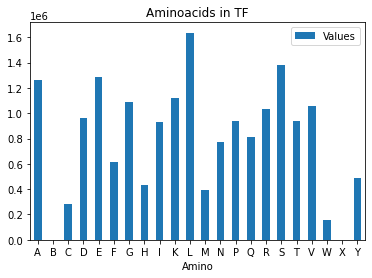

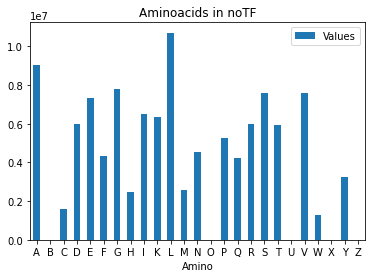

In [7]:
# Gráficas histograma de aminoacidos

import pandas as pd

amino_tf = pd.DataFrame(list(amino2count_tf.items()) , columns = ['Amino', 'Values'])
amino_tf = amino_tf.sort_values(by = ['Amino'], ascending = True)
ax = amino_tf.plot.bar(x = 'Amino', y = 'Values', rot = 0, title = 'Aminoacids in TF')

amino_notf = pd.DataFrame(list(amino2count_notf.items()) , columns = ['Amino', 'Values'])
amino_notf = amino_notf.sort_values(by = ['Amino'])
ax = amino_notf.plot.bar(x = 'Amino', y = 'Values', rot = 0, title = 'Aminoacids in noTF')

In [8]:
# Tokenization

from tensorflow.keras.preprocessing.text import Tokenizer

amino_names = list(amino_notf['Amino'])
print('Aminoacids present in dataset: ', amino_names)
print('Number of different aminoacids: ', len(amino_names))

tokenizer = Tokenizer(num_words = len(amino_names), char_level = True)
tokenizer.fit_on_texts(amino_names)

print('Aminoacids tokenization: ', tokenizer.word_index)
print('Number of aminoacids tokenized: ', len(tokenizer.word_index))

example_tokenized = tokenizer.texts_to_sequences([seq_tfs[0]])
print('Example of tfs sequence: ', seq_tfs[0])
print('Example of tfs sequence tokenized: ', example_tokenized)

Aminoacids present in dataset:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Number of different aminoacids:  25
Aminoacids tokenization:  {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}
Number of aminoacids tokenized:  25
Example of tfs sequence:  MTMTLHTKASGMALLHQIQGNELEPLNRPQLKMPMERALGEVYVDNSKPAVFNYPEGAAYEFNAAAAAAAAGASAPVYGQSSITYGPGSEAAAFGANSLGAFPQLNSVSPSPLMLLHPPPHVSPFLHPHGHQVPYYLENEPSAYAVRDTGPPAFYRSNSDNRRQNGRERLSSSSEKGNMIMESAKETRYCAVCNDYASGYHYGVWSCEGCKAFFKRSIQGHNDYMCPATNQCTIDKNRRKSCQACRLRKCYEVGMMKGGIRKDRRGGRMLKHKRQRDDLEGRNEMGTSGDMRAANLWPSPLVIKHTKKNSPALSLTADQMVSALLDAEPPLIYSEYDPSRPFSEASMMGLLTNLADRELVHMINWAKRVPGFGDLNLHDQVHLLECAWLEILMIGLVWRSMEHPGKLLFAPNLLLDRNQGKCVEGMVEIFDMLLATSSRFRMMNLQGEEFVCLKSIILLNSGVYTFLSSTLKSLEEKDHIHRVLDKINDTLIHLMAKAGLT

In [9]:
# Zero padding

from tensorflow.keras.preprocessing.sequence import pad_sequences

def get_sequences(tokenizer , database):
  sequences_token = tokenizer.texts_to_sequences(database)
  sequences_padded = pad_sequences(sequences_token , truncating = 'post' , 
                                   padding = 'post' , maxlen = 1024)
  return sequences_padded

padded_seq_tfs = get_sequences(tokenizer , seq_tfs)

print('Size of full tfs dataset sequence padded: ', padded_seq_tfs.shape)
print('Length of padded example: ', len(padded_seq_tfs[0]))
print('Example of tfs sequence padded: ', padded_seq_tfs[0])

Size of full tfs dataset sequence padded:  (34977, 1024)
Length of padded example:  1024
Example of tfs sequence padded:  [12 19 12 ...  0  0  0]


In [10]:
padded_seq_notfs = get_sequences(tokenizer , seq_notfs[0:35000])

print('Size of full notfs dataset sequence padded: ', padded_seq_notfs.shape)
print('Length of padded example: ', len(padded_seq_notfs[0]))
print('Example of tfs sequence padded: ', padded_seq_notfs[0])

Size of full notfs dataset sequence padded:  (35000, 1024)
Length of padded example:  1024
Example of tfs sequence padded:  [12  5 17 ...  0  0  0]


In [11]:
# Concatenation and generating labels

seq_train = np.concatenate((padded_seq_tfs , padded_seq_notfs))
print('Size of full database concatenated: ', seq_train.shape)

labels_ones = np.ones((padded_seq_tfs.shape[0],), dtype = int)
labels_zeros = np.zeros((padded_seq_notfs.shape[0],), dtype = int)
labels = np.concatenate ((labels_ones , labels_zeros))
print('Size of labels vector: ', labels.shape)

Size of full database concatenated:  (69977, 1024)
Size of labels vector:  (69977,)


# LSTM training

In [12]:
import tensorflow as tf
import sys
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

print("TensorFlow Version:", tf.__version__)
print("Python", sys.version)

gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

TensorFlow Version: 2.7.0
Python 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
GPU is available


In [13]:
model = tf.keras.models.Sequential([
                                   tf.keras.layers.Embedding(15000, 100, input_length = 1024),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences = True)),
                                   tf.keras.layers.Dropout(0.5),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                                   tf.keras.layers.Dense(1, activation = 'sigmoid')
                                  ])

model.compile(
              loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics =['accuracy']
              )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1024, 100)         1500000   
                                                                 
 bidirectional (Bidirectiona  (None, 1024, 256)        234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 1024, 256)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,898,977
Trainable params: 1,898,977
Non-

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(seq_train, labels, test_size = 0.2, 
                                                      random_state = 1, shuffle = True)
print('X_train shape:',X_train.shape, type(X_train))
print('y_train shape:',y_train.shape, type(y_train))

print('X_valid shape:',X_valid.shape, type(X_valid))
print('y_valid shape:',y_valid.shape, type(y_valid))

X_train shape: (55981, 1024) <class 'numpy.ndarray'>
y_train shape: (55981,) <class 'numpy.ndarray'>
X_valid shape: (13996, 1024) <class 'numpy.ndarray'>
y_valid shape: (13996,) <class 'numpy.ndarray'>


In [16]:
callbacks = [
    EarlyStopping(patience = 8, verbose = 1),
    ReduceLROnPlateau(factor = 0.1, patience = 2, min_lr = 0.0001, verbose = 1),
    ModelCheckpoint('model_tfs.h5', verbose = 1, save_best_only = True, save_weights_only = False)
    ]

h = model.fit(X_train, y_train,
              validation_data = (X_valid, y_valid),
              epochs = 10,
              batch_size = 128,
              callbacks = callbacks
              )

Epoch 1/10
438/438 [==============================] - ETA: 0s - loss: 0.6452 - accuracy: 0.6247
Epoch 00001: val_loss improved from inf to 0.66887, saving model to model_tfs.h5
438/438 [==============================] - 380s 868ms/step - loss: 0.6452 - accuracy: 0.6247 - val_loss: 0.6689 - val_accuracy: 0.5574 - lr: 0.0010
Epoch 2/10
438/438 [==============================] - ETA: 0s - loss: 0.6562 - accuracy: 0.6114
Epoch 00002: val_loss improved from 0.66887 to 0.64296, saving model to model_tfs.h5
438/438 [==============================] - 375s 857ms/step - loss: 0.6562 - accuracy: 0.6114 - val_loss: 0.6430 - val_accuracy: 0.6376 - lr: 0.0010
Epoch 3/10
438/438 [==============================] - ETA: 0s - loss: 0.6208 - accuracy: 0.6597
Epoch 00003: val_loss did not improve from 0.64296
438/438 [==============================] - 383s 874ms/step - loss: 0.6208 - accuracy: 0.6597 - val_loss: 0.7074 - val_accuracy: 0.6501 - lr: 0.0010
Epoch 4/10
438/438 [==============================]

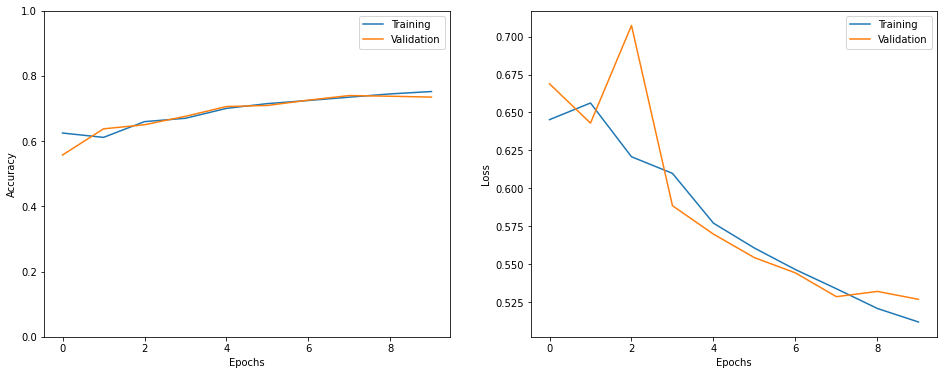

In [17]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(h)

# Deep TFactor

In [ ]:
# import torch packages
import torch
import torch.nn as nn

class DeepTFactor(nn.Module):
    def __init__(self, out_features=[0]):
        super(DeepTFactor, self).__init__()
        self.explainECs = out_features
        self.layer_info = [[4, 4, 16], [12, 8, 4], [16, 4, 4]]
        self.cnn0 = CNN(self.layer_info)
        self.fc1 = nn.Linear(in_features=128*3, out_features=512)
        self.bn1 = nn.BatchNorm1d(num_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=len(out_features))
        self.bn2 = nn.BatchNorm1d(num_features=len(out_features))
        self.out_act = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.init_weights()


    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.xavier_uniform_(m.weight)
            elif isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)

        
    def forward(self, x):
        x = self.cnn0(x)
        x = x.view(-1, 128*3)
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.out_act(self.bn2(self.fc2(x)))
        return x


class CNN(nn.Module):
    '''
    Use second level convolution.
    channel size: 4 -> 16 
                  8 -> 12
                  16 -> 4
    '''
    def __init__(self, layer_info):
        super(CNN, self).__init__()
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)

        self.layers = nn.ModuleList()
        pooling_sizes = []
        for subnetwork in layer_info:
            pooling_size = 0
            self.layers += [self.make_subnetwork(subnetwork)]
            for kernel in subnetwork:
                pooling_size += (-kernel + 1)
            pooling_sizes.append(pooling_size)
              
        if len(set(pooling_sizes)) != 1:
            raise "Different kernel sizes between subnetworks"
        pooling_size = pooling_sizes[0]
        num_subnetwork = len(layer_info)
        
        self.conv = nn.Conv2d(in_channels=128*num_subnetwork, out_channels=128*3, kernel_size=(1,1))
        self.batchnorm = nn.BatchNorm2d(num_features=128*3)
        self.pool = nn.MaxPool2d(kernel_size=(1000+pooling_size,1), stride=1)


    def make_subnetwork(self, subnetwork):
        subnetworks = []
        for i, kernel in enumerate(subnetwork):
            if i == 0:
                subnetworks.append(
                    nn.Sequential(
                        nn.Conv2d(in_channels=1, out_channels=128, kernel_size=(kernel, 21)),
                        nn.BatchNorm2d(num_features=128),
                        nn.ReLU(),
                        nn.Dropout(p=0.1)
                    )
                )
            else:
                subnetworks.append(
                    nn.Sequential(
                        nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(kernel, 1)),
                        nn.BatchNorm2d(num_features=128),
                        nn.ReLU(),
                        nn.Dropout(p=0.1)
                    )
                )
        return nn.Sequential(*subnetworks)

        
    def forward(self, x):
        xs = []
        for layer in self.layers:
            xs.append(layer(x))
        x = torch.cat(xs, dim=1)
        x = self.relu(self.batchnorm(self.conv(x)))
        x = self.pool(x)
        return x

In [ ]:
import re
import logging
import argparse

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# import basic python packages
import numpy as np

from Bio import SeqIO

# import torch packages
import torch
import torch.nn as nn

# import scikit learn packages
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score


def argument_parser(version=None):
    def boolean_string(s):
        if s not in {'False', 'True'}:
            raise ValueError('Not a valid boolean string')
        return s == 'True'
    
    parser = argparse.ArgumentParser()
    parser.add_argument('-o', '--output_dir', required=True, 
                        help='Output directory')
    parser.add_argument('-g', '--gpu', required=False, 
                        default='cpu', help='Specify gpu')
    parser.add_argument('-b', '--batch_size', required=False, type=int,
                        default=128, help='Batch size')
    parser.add_argument('-ckpt', '--checkpoint', required=False, 
                        default='./trained_model/DeepTFactor_ckpt.pt', help='Checkpoint file')
    parser.add_argument('-i', '--seq_file', required=False, 
                        default='./Dataset/ec_seq.fa', help='Sequence data')
    parser.add_argument('-cpu', '--cpu_num', required=False, type=int,
                        default=1, help='Number of cpus to use')    
    return parser

# Codigo Propio

1. Se procesan los datos de la siguiente manera, 
   a. Se elimina aquellas secuencias con más de 1,000 aminoacidos de longitud.
   b. Se crean los tensores de NoTFs y TFs


In [ ]:
def read_data(file, tfs = False):
    protein_seqs, seq_ids = read_fasta_data(file)
    
    if tfs:
        pseudo_labels = np.ones((len(protein_seqs)))
    else:
        pseudo_labels = np.zeros((len(protein_seqs)))
    
    proteinDataset = EnzymeDataset(protein_seqs, pseudo_labels)
    
    return protein_seqs, seq_ids, proteinDataset
    

In [ ]:
FILE_TFS = data_path + 'TFS.fasta'
FILE_NOTFS = data_path + 'NoTfs.fasta'

r_true, s_true , tfs_true = read_data(FILE_TFS, True)
r_false ,s_false ,tfs_false = read_data(FILE_NOTFS)

In [ ]:
cont = 0
for seq in s_true:
    if seq == "sp|P05621|H2B2_WHEAT":
        print(seq,cont)    
    cont += 1
    
print(s_true[1])
print(cont)

print(tfs_true[14645][1][:][:])
print(tfs_false[14645][1][:][:])